# Inference plots

This example shows you different ways to plot the results of an MCMC routine.

Running
Done!


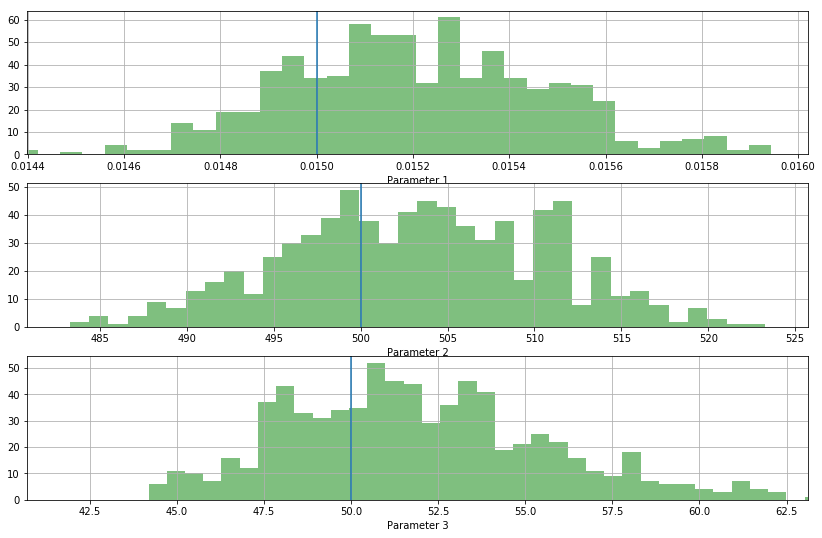

In [6]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 50
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
prior = pints.UniformPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
    )

# Create a Bayesian log-likelihood (prior * likelihood)
log_likelihood = pints.BayesianLogLikelihood(prior, log_likelihood)

# Run an adaptive mcmc routine
x0 = real_parameters * 1.2
mcmc = pints.AdaptiveCovarianceMCMC(log_likelihood, x0)
mcmc.set_verbose(False)

print('Running')
chain = mcmc.run()
print('Done!')

# Plot output
pl.figure(figsize=(14, 9))
for i, real in enumerate(real_parameters):
    
    # Add subplot
    pl.subplot(len(real_parameters), 1, 1+i)
    pl.xlabel('Parameter ' + str(i + 1))
    
    # Show true value
    pl.axvline(real)
    
    # Show histogram of chain
    pl.hist(chain[:,i], label='p' + str(i + 1), bins=40, color='green',
        alpha=0.5)
    
    # Center plot around mean of chain
    mu = np.mean(chain[:,i])
    sigma = np.std(chain[:,i])
    pl.xlim(mu - 3 * sigma, mu + 3 * sigma)

pl.show()


## Trace plot

Running
Done!


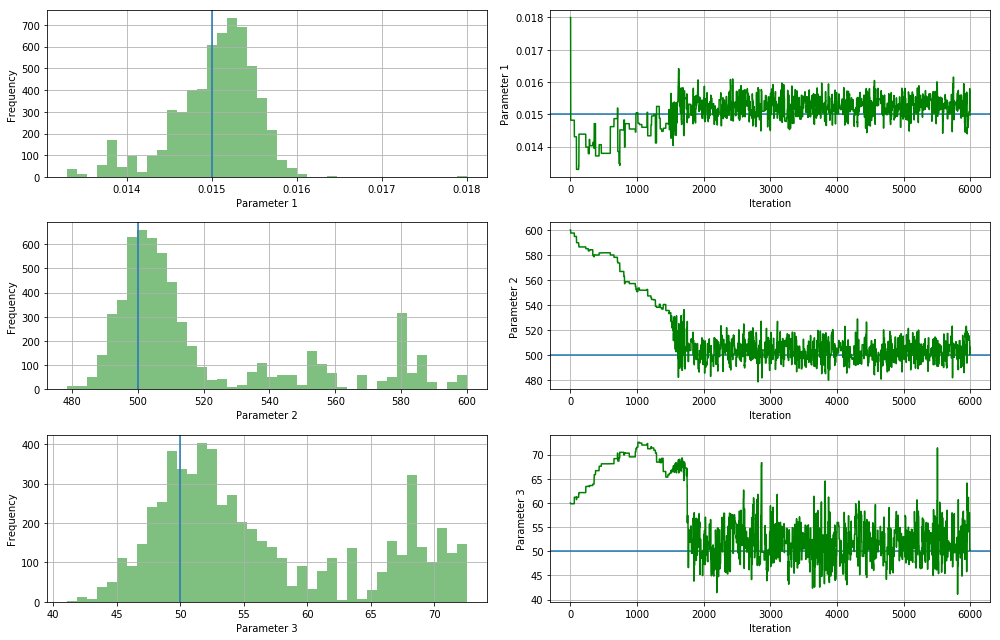

In [8]:
# Disable burn-in and thinning: Show all samples!
mcmc.set_burn_in(0)
mcmc.set_thinning_rate(1)

print('Running')
chain = mcmc.run()
print('Done!')

# Show histogram and traces
pl.figure(figsize=(14, 9))
nparam = len(real_parameters)
for i, real in enumerate(real_parameters):
    
    # Add histogram subplot
    pl.subplot(nparam, 2, 1 + 2 * i)
    pl.xlabel('Parameter ' + str(i + 1))
    pl.ylabel('Frequency')
    pl.axvline(real)
    pl.hist(chain[:,i], label='p' + str(i + 1), bins=40, color='green',
        alpha=0.5)

    # Add trace subplot
    pl.subplot(nparam, 2, 2 + 2 * i)
    pl.xlabel('Iteration')
    pl.ylabel('Parameter ' + str(i + 1))
    pl.axhline(real)
    pl.plot(chain[:,i], color='green')

pl.tight_layout()
pl.show()

In [ ]:
#TODO: Repeat this, but with KDE (kernel density estimator) plot on the left

## Pairwise scatterplot

In [ ]:
# Triangle plot!

## Autocorrelation plot

375


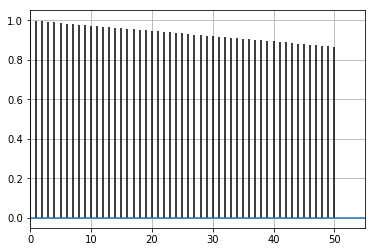

In [40]:
pl.figure()
print(len(chain[:,0]))
pl.acorr(chain[:,0], maxlags=50)
pl.xlim(0,None)
pl.show()

## Fitting result

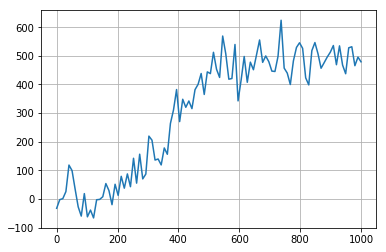

In [41]:
pl.figure()
pl.plot(times, values)
pl.show()


Running
Done!


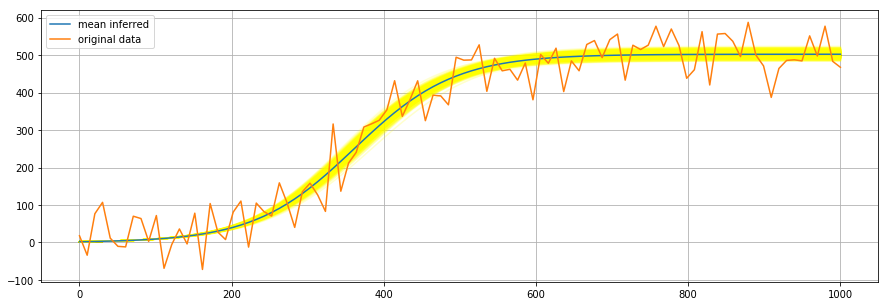

In [10]:
# Disable burn-in and thinning: Show all samples!
mcmc.set_burn_in(3000)
mcmc.set_thinning_rate(4)

print('Running')
chain = mcmc.run()
print('Done!')

# Evaluate the model for all inferred parameters
new_values = []
for params in chain:
    new_values.append(problem.evaluate(params[:2]))
new_values = np.array(new_values)
mean_values = np.mean(new_values, axis=0)

# Plot them
pl.figure(figsize=(15, 5))
for v in new_values:
    pl.plot(times, v, color='yellow', alpha=0.1)
pl.plot(times, mean_values, label='mean inferred')
pl.plot(times, values, label='original data')
pl.legend()
pl.show()